
# Importação de bibliotecas

In [31]:
import pandas as pd
import numpy as np
from classifiers.naive_bayes_classifier import NaiveBayesClassifier
from utils.synthetic_data_generator import SyntheticDatasetGenerator
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [32]:
np.random.seed(42)
CLASSIFIER_NAME = "Naive Bayes Classifier"
TARGET_COLUMN_NAME = "y"
DATASET_NAME = "Synthetic"
ACTIVITY_NUMBER = 3
TEST_SIZE = 0.3
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Geração de dados sintéticos

In [33]:
features_patterns = {
    "pattern_1": {"pattern": np.array([[2, 2]]), "num_samples": 40, "y": 0},
    "pattern_2": {"pattern": np.array([[1, 3]]), "num_samples": 40, "y": 1},
    "pattern_3": {"pattern": np.array([[3, 3]]), "num_samples": 40, "y": 2},
}

generator = SyntheticDatasetGenerator()
synthetic_df = generator.generate_data(features_patterns)

In [34]:
list(synthetic_df[TARGET_COLUMN_NAME].unique())

[np.int64(0), np.int64(1), np.int64(2)]

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Naive Bayes

In [35]:
naive_bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=synthetic_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

bayesian_accuracy_list = []

for train_indexes, test_indexes in naive_bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=synthetic_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = NaiveBayesClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_df_results = pd.DataFrame(
    bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,1.0,0.0,"[42, 50, 113, 40, 41, 54, 35, 27, 26, 25, 69, 12, 11, 119, 96, 65, 49, 4, 109, 7, 88, 20, 10, 46, 98, 100, 118, 39, 63, 29, 55, 34, 76, 110, 22, 117, 79, 90, 75, 86, 80, 23, 31, 114, 115, 111, 95, 105, 6, 89, 84, 62, 85, 52, 59, 74, 116, 73, 38, 30, 107, 57, 94, 72, 9, 47, 112, 91, 61, 17, 92, 60, 103, 82, 67, 2, 8, 101, 13, 36, 16, 53, 68, 18]","[0, 1, 3, 5, 14, 15, 19, 21, 24, 28, 32, 33, 37, 43, 44, 45, 48, 51, 56, 58, 64, 66, 70, 71, 77, 78, 81, 83, 87, 93, 97, 99, 102, 104, 106, 108]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[13, 0, 0], [0, 13, 0], [0, 0, 10]]"
1,1.0,0.0,"[93, 22, 108, 19, 87, 10, 7, 8, 65, 29, 112, 24, 9, 80, 52, 71, 69, 21, 91, 102, 113, 95, 100, 107, 48, 33, 109, 74, 90, 58, 5, 115, 23, 47, 25, 32, 54, 63, 117, 92, 0, 81, 34, 38, 79, 61, 20, 82, 27, 42, 75, 39, 67, 97, 57, 60, 49, 12, 118, 55, 86, 89, 70, 96, 116, 37, 14, 73, 6, 17, 50, 2, 16, 43, 119, 101, 53, 62, 111, 83, 3, 110, 11, 88]","[1, 4, 13, 15, 18, 26, 28, 30, 31, 35, 36, 40, 41, 44, 45, 46, 51, 56, 59, 64, 66, 68, 72, 76, 77, 78, 84, 85, 94, 98, 99, 103, 104, 105, 106, 114]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[11, 0, 0], [0, 15, 0], [0, 0, 10]]"
2,1.0,0.0,"[4, 116, 60, 104, 70, 100, 34, 50, 94, 33, 118, 42, 65, 27, 79, 111, 69, 43, 114, 63, 14, 45, 101, 103, 51, 57, 16, 28, 85, 37, 102, 81, 110, 74, 49, 106, 80, 17, 24, 76, 108, 22, 7, 96, 2, 31, 21, 78, 71, 53, 87, 67, 6, 95, 9, 59, 20, 25, 15, 113, 52, 91, 39, 107, 84, 97, 11, 115, 13, 88, 23, 5, 1, 55, 105, 8, 77, 86, 10, 3, 18, 68, 92, 32]","[0, 12, 19, 26, 29, 30, 35, 36, 38, 40, 41, 44, 46, 47, 48, 54, 56, 58, 61, 62, 64, 66, 72, 73, 75, 82, 83, 89, 90, 93, 98, 99, 109, 112, 117, 119]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[9, 0, 0], [0, 16, 0], [0, 0, 11]]"
3,1.0,0.0,"[20, 61, 40, 39, 34, 57, 84, 63, 81, 105, 25, 75, 29, 110, 73, 89, 26, 68, 53, 38, 51, 32, 54, 111, 42, 92, 21, 87, 77, 99, 2, 16, 19, 12, 117, 9, 46, 71, 7, 76, 5, 27, 106, 78, 86, 62, 47, 37, 10, 45, 90, 31, 104, 85, 1, 50, 36, 41, 48, 83, 108, 35, 69, 93, 15, 95, 112, 59, 79, 66, 43, 107, 58, 118, 97, 119, 82, 49, 55, 11, 72, 14, 56, 64]","[0, 3, 4, 6, 8, 13, 17, 18, 22, 23, 24, 28, 30, 33, 44, 52, 60, 65, 67, 70, 74, 80, 88, 91, 94, 96, 98, 100, 101, 102, 103, 109, 113, 114, 115, 116]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[14, 0, 0], [0, 7, 0], [0, 0, 15]]"
4,1.0,0.0,"[29, 50, 100, 10, 78, 23, 80, 108, 11, 97, 118, 49, 7, 48, 95, 62, 5, 24, 74, 64, 52, 54, 26, 119, 56, 8, 99, 16, 102, 59, 41, 68, 65, 44, 37, 85, 35, 86, 27, 117, 9, 69, 63, 61, 39, 40, 47, 101, 31, 88, 67, 83, 104, 114, 106, 32, 76, 113, 81, 57, 55, 1, 70, 98, 30, 60, 75, 87, 4, 58, 20, 79, 111, 42, 112, 72, 14, 116, 6, 115, 71, 110, 109, 77]","[0, 2, 3, 12, 13, 15, 17, 18, 19, 21, 22, 25, 28, 33, 34, 36, 38, 43, 45, 46, 51, 53, 66, 73, 82, 84, 89, 90, 91, 92, 93, 94, 96, 103, 105, 107]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[17, 0, 0], [0, 7, 0], [0, 0, 12]]"
...,...,...,...,...,...,...
195,1.0,0.0,"[67, 24, 78, 76, 54, 68, 84, 36, 57, 91, 37, 107, 30, 47, 97, 35, 66, 52, 6, 77, 111, 73, 99, 27, 33, 75, 9, 106, 81, 45, 55, 19, 103, 116, 15, 41, 29, 32, 95, 61, 13, 96, 51, 56, 11, 108, 21, 20, 46, 72, 60, 1, 93, 17, 14, 25, 100, 5, 10, 22, 63, 28, 87, 40, 50, 0, 83, 101, 53, 113, 109, 39, 65, 104, 89, 118, 88, 117, 115, 82, 23, 44, 112, 26]","[2, 3, 4, 7, 8, 12, 16, 18, 31, 34, 38, 42, 43, 48, 49, 58, 59, 62, 64, 69, 70, 71, 74, 79, 80, 85, 86, 90, 92, 94, 98, 102, 105, 110, 114, 119]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[[1

# Vetor de acurácias

In [36]:
bayesian_accuracy_vector = pd.Series(bayesian_df_results["accuracy"])

In [37]:
bayesian_accuracy_vector

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [38]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Naive Bayes

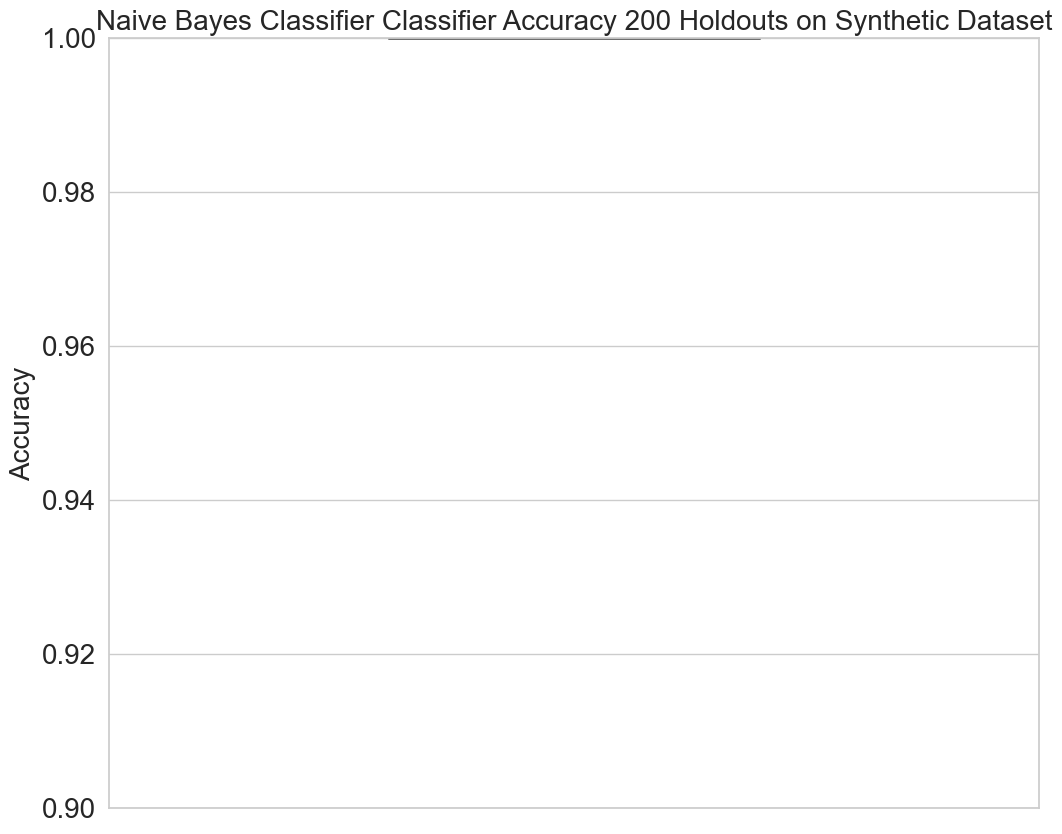

In [39]:
image_type = "boxplot"

image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [40]:
max_accuracy = bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_df_results[
    bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=synthetic_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índice selecionado aleatoriamente: 73
Acurácia do índice selecionado: 100.00%


# Resgatando a matriz de confusão e plotando ela

In [41]:
confusion_matrix_result = bayesian_df_results.loc[index_selected, "confusion_matrix"]

In [42]:
confusion_matrix_result

array([[15,  0,  0],
       [ 0,  4,  0],
       [ 0,  0, 17]])

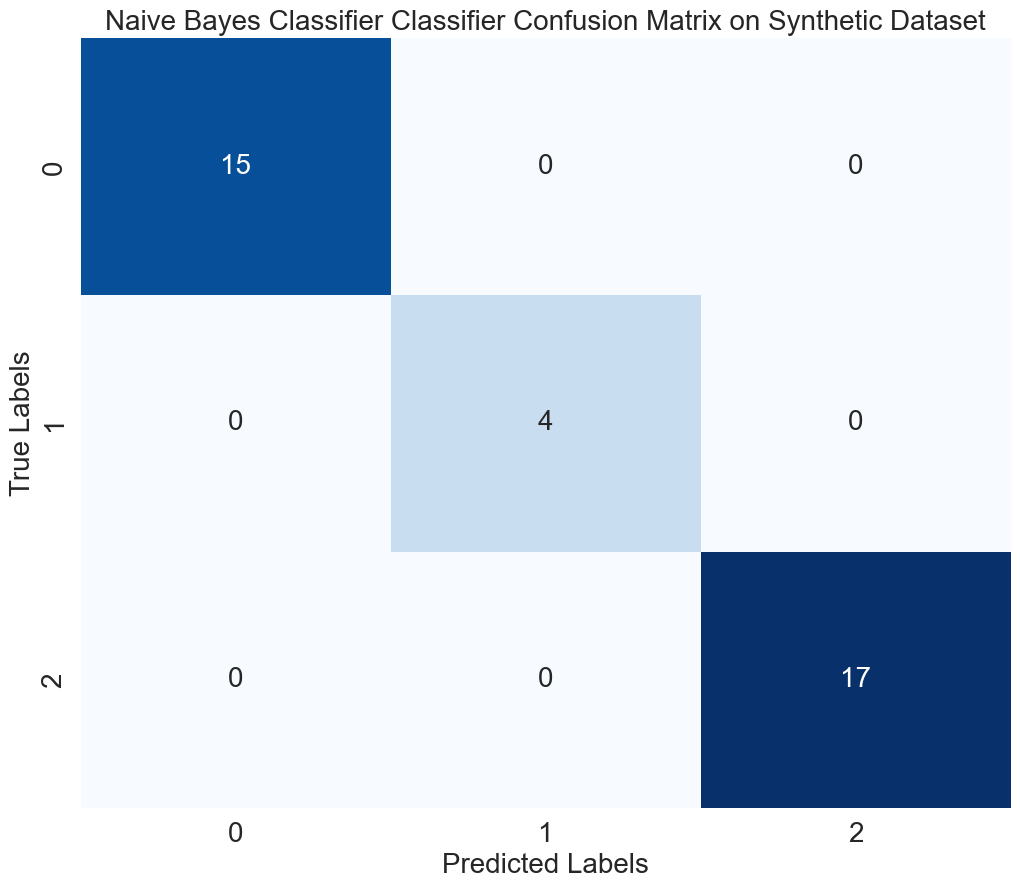

In [43]:
image_type = "confusion_matrix"

image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Naive Bayes baseado em duas features

In [44]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = NaiveBayesClassifier()
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

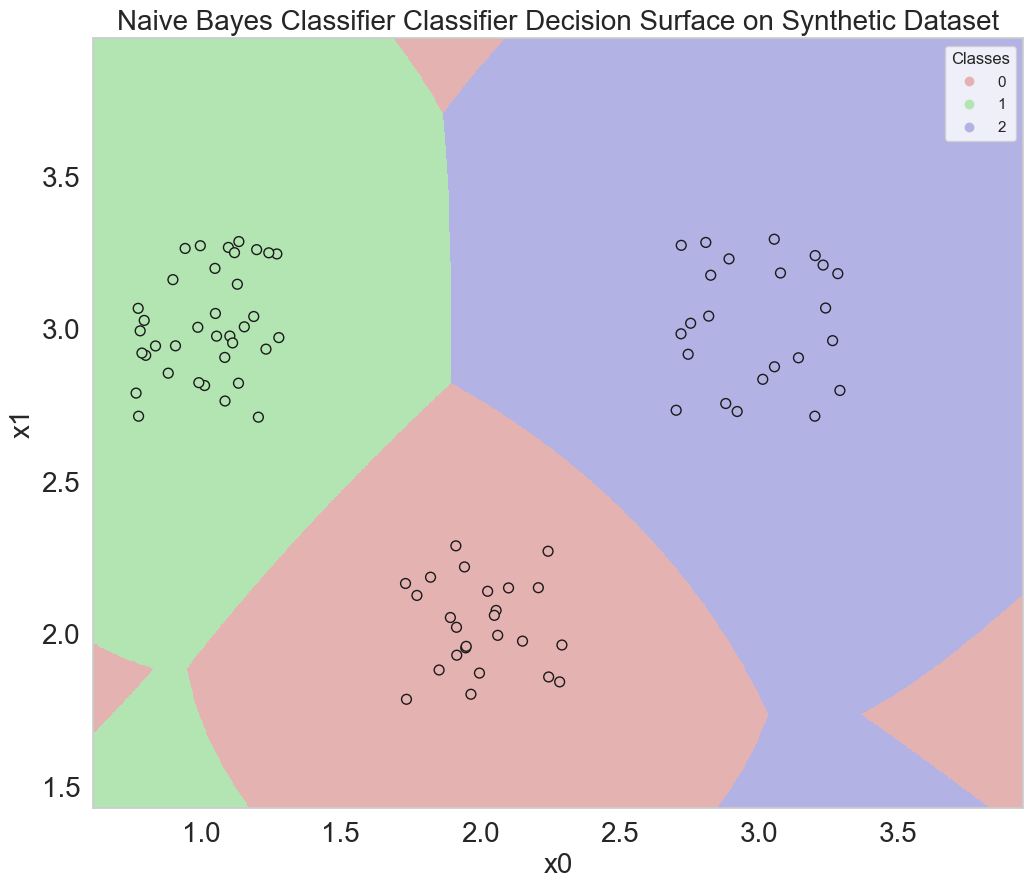

In [45]:
image_type = "decision_surface"

image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save=f"../../data/images/atividade_{ACTIVITY_NUMBER}/{DATASET_NAME.lower()}_{CLASSIFIER_NAME.replace(' ', '_').lower()}_{image_type.lower()}.jpeg",
        num_classes=len(np.unique(y_train)),
    show=True,
)